<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/i_audio_embeddings_using_imagebind_llms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part I
## Audio Embeddings using Imagebind LLMs

Hints:   

1. [K-Means Clustering and PCA to categorize music by similar audio features](https://towardsdatascience.com/k-means-clustering-and-pca-to-categorize-music-by-similar-audio-features-df09c93e8b64)
2. [Clustering audio features](https://mct-master.github.io/machine-learning/2023/04/25/ninojak-clustering-audio.html)
3. [Audio Clustering with Deep Learning](https://ridakhan5.medium.com/audio-clustering-with-deep-learning-a7991d605fa5)
4. [Audio feature extraction and clustering](https://www.kaggle.com/code/humblediscipulus/audio-feature-extraction-and-clustering)

Dataset Source:

[Audio Cats and Dogs](https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs)

Sources Used:
1. ChatGPT-4
2. All listed hints

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install librosa
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.2 MB/s eta 0:00:00


In [4]:
!pip install librosa
!pip install matplotlib
!pip install IPython
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00


In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import glob
from IPython.display import Audio
import librosa.display

### Defining Helper Functions

In [7]:
# Function to extract MFCC features from audio file
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None
    return mfccs_processed

# Function to play an audio file
def play_audio(file_path):
    return Audio(file_path)

# Function to plot a waveplot
def plot_wave(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f"Waveplot - {remove_prefix_path(file_name)}")
    plt.show()

# Function to plot a spectrogram
def plot_spectrogram(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {remove_prefix_path(file_name)}")
    plt.show()

# Function to plot MFCCs
def plot_mfccs(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs - {remove_prefix_path(file_name)}")
    plt.show()

# Function to remove prefixes from paths to better show file names
def remove_prefix_path(input_str):
  prefix_path = "/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/"
  output = input_str.removeprefix(prefix_path)
  return output


### Load Dataset

In [8]:
audio_files = glob.glob("/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/*.wav")

### Feature Extraction

In [9]:
features = []

for file in audio_files:
    data = extract_features(file)
    if data is not None:
        features.append([data, file])


### Data Preprocessing and Clustering

In [10]:
X = np.array([item[0] for item in features])
y = np.array([item[1] for item in features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.26025480031967163


### Analyze Clusters with Visualizations and Audio Playback

Analyzing Cluster 1
File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/cat_67.wav


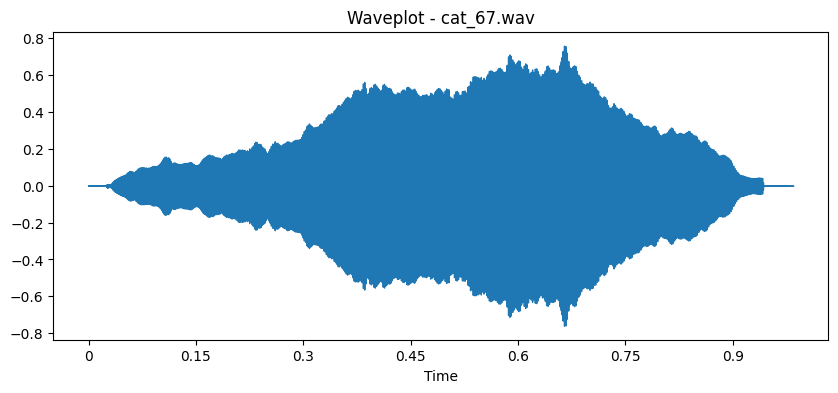

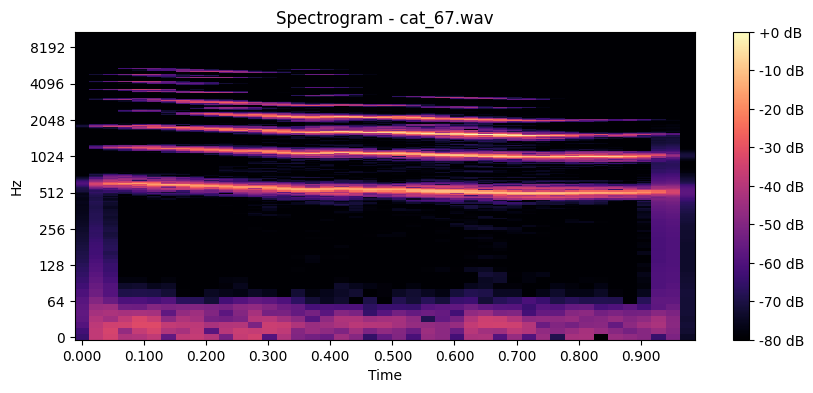

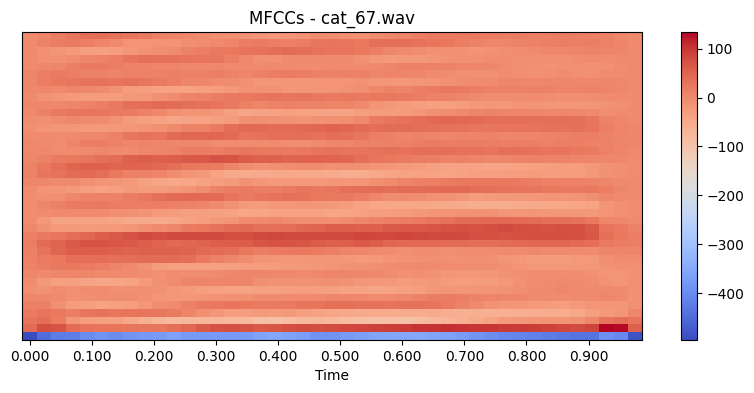

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/dog_barking_49.wav


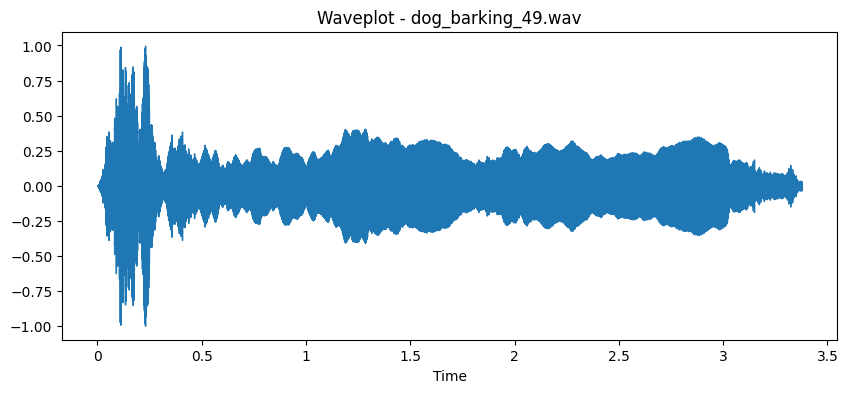

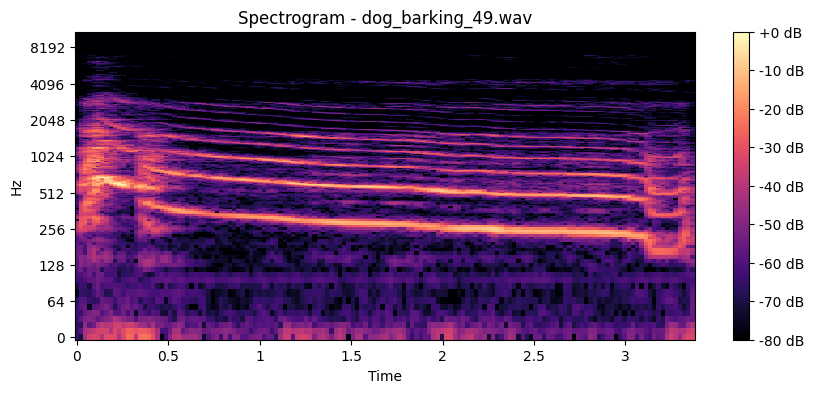

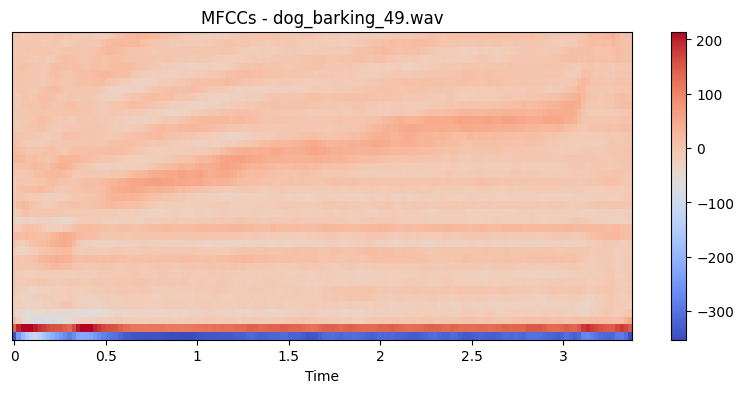

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/dog_barking_67.wav


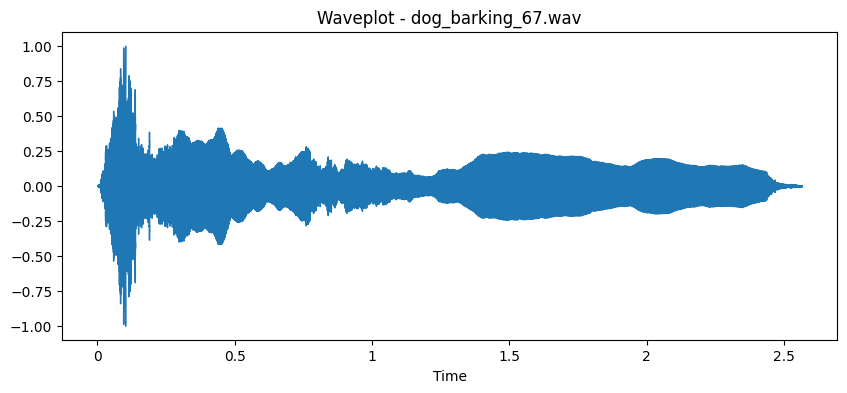

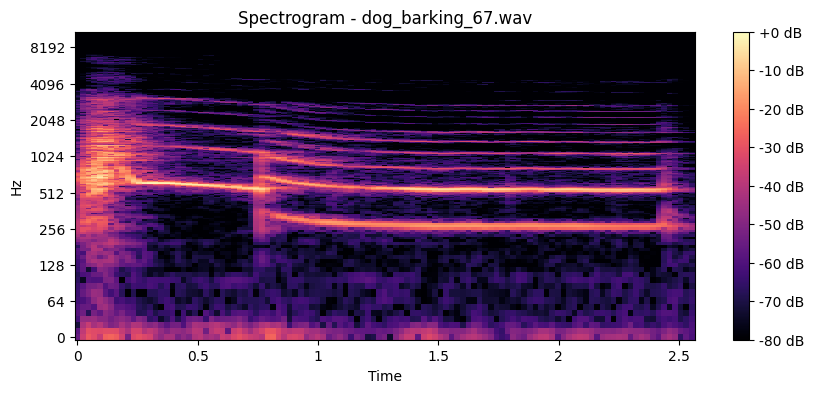

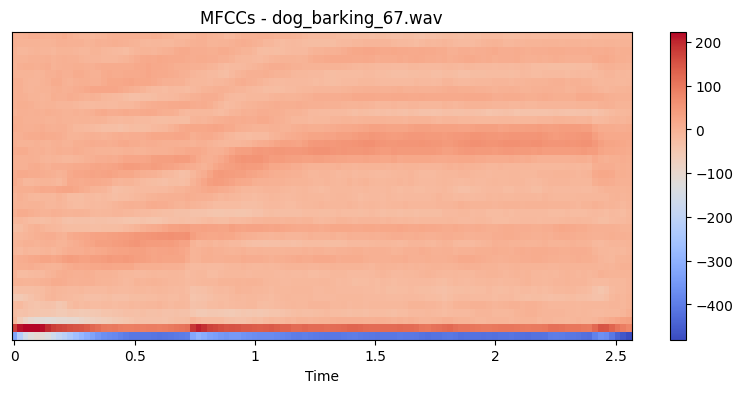

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/dog_barking_87.wav


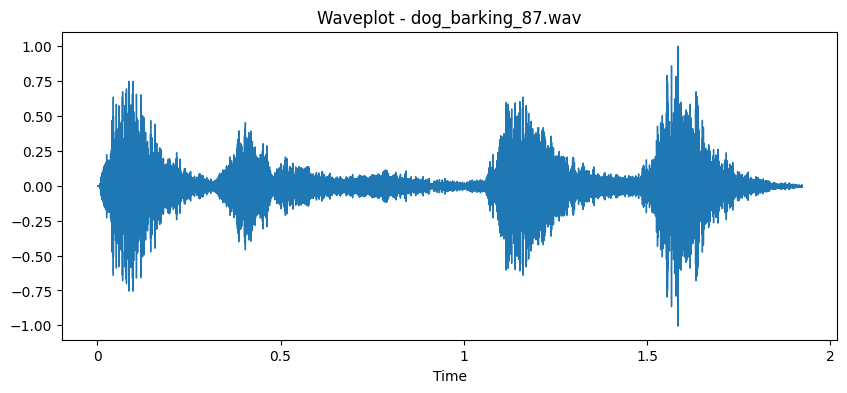

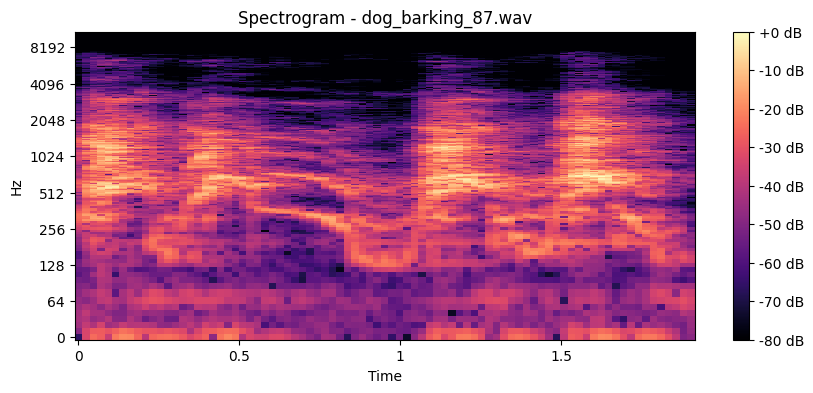

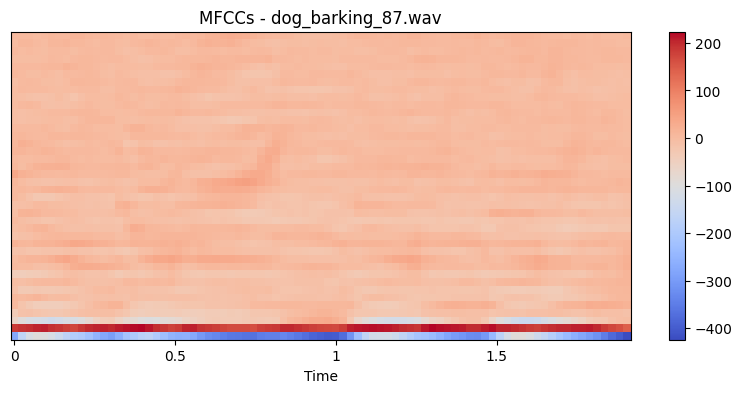

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/dog_barking_63.wav


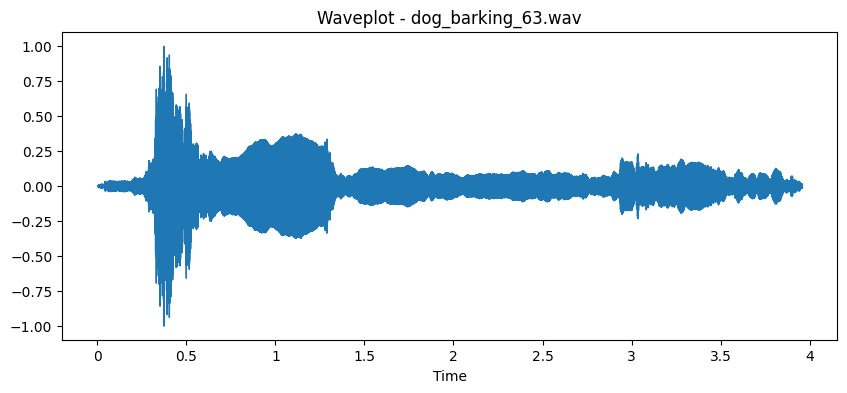

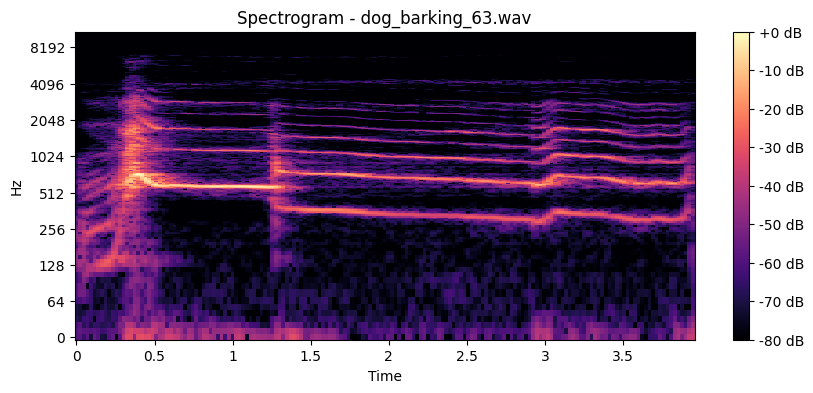

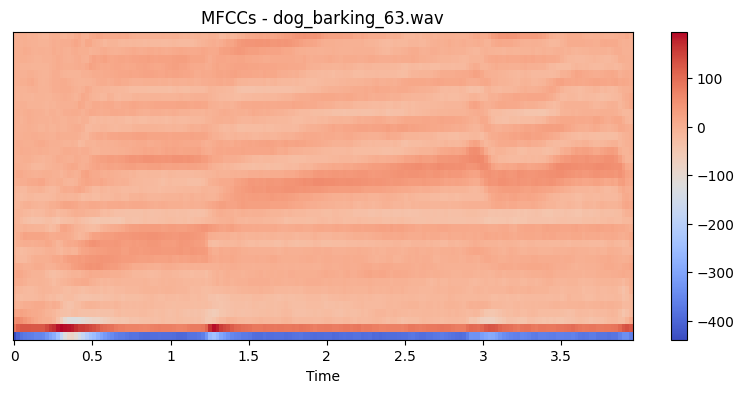


--------------------------------------------------

Analyzing Cluster 2
File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/cat_1.wav


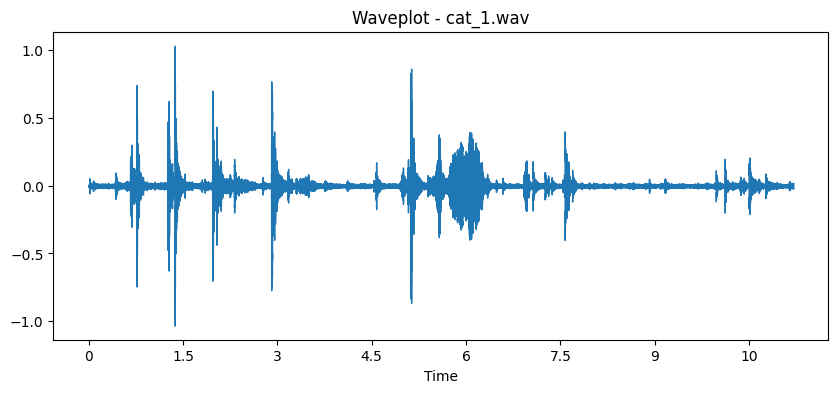

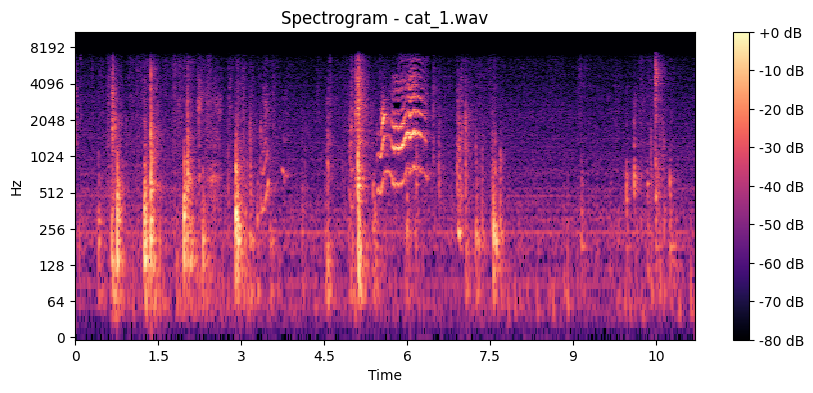

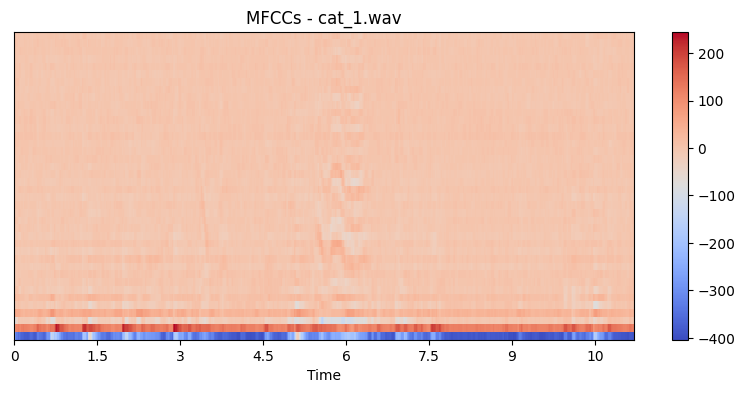

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/cat_110.wav


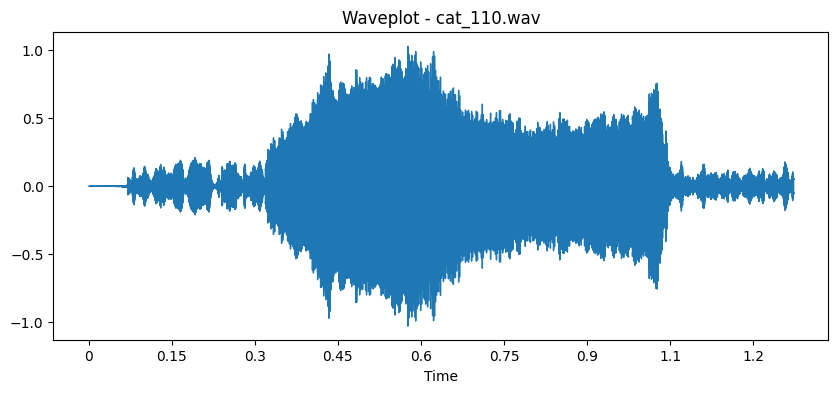

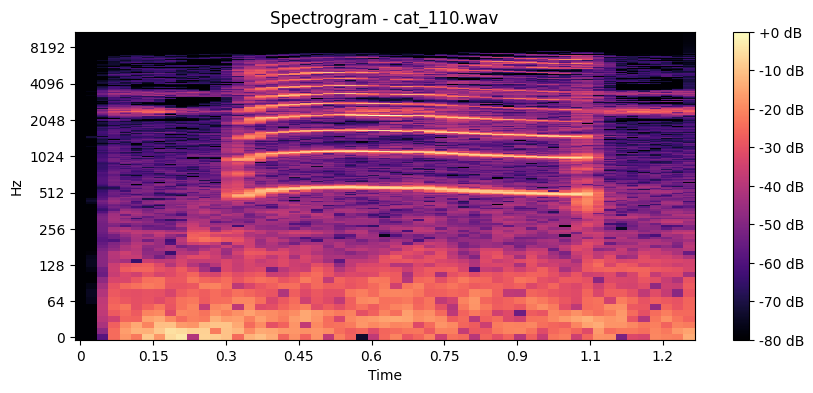

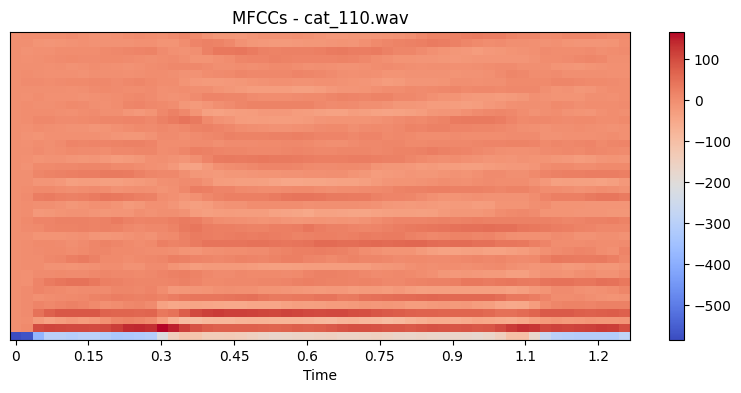

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/cat_107.wav


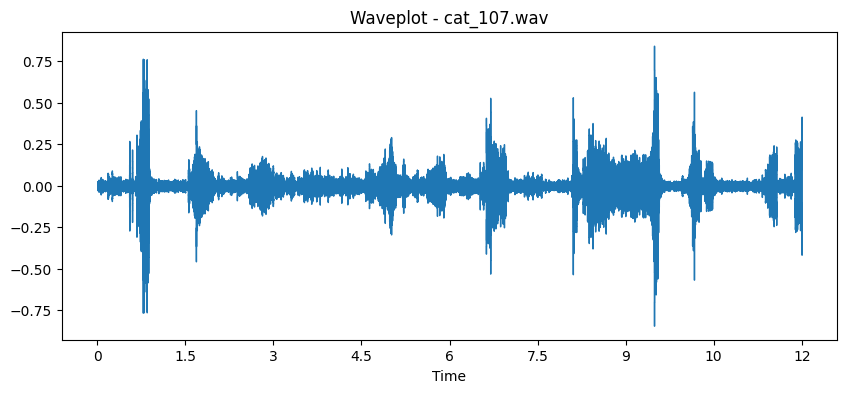

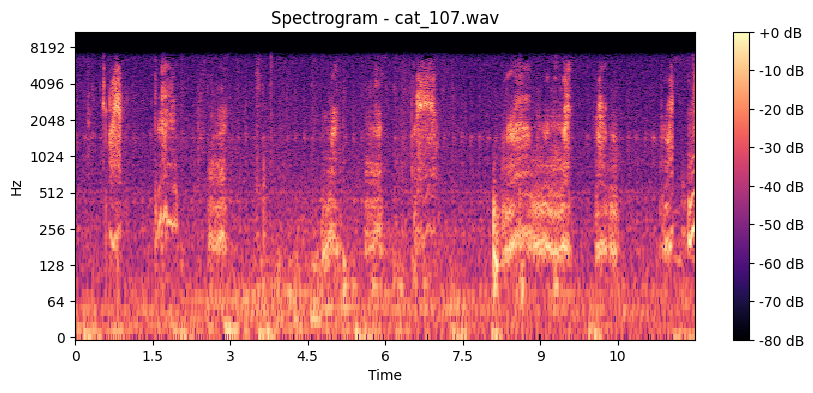

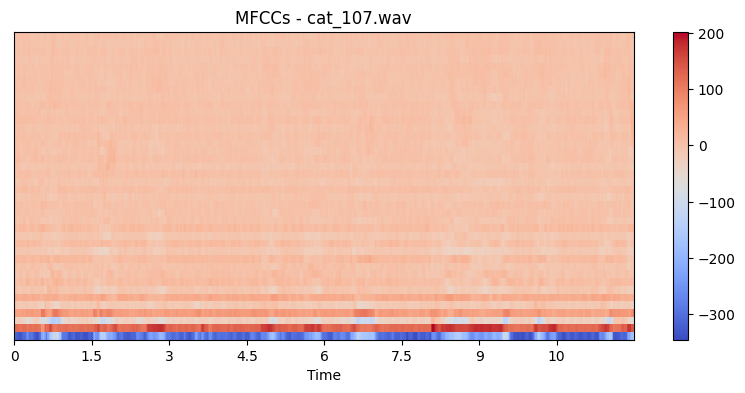

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/cat_112.wav


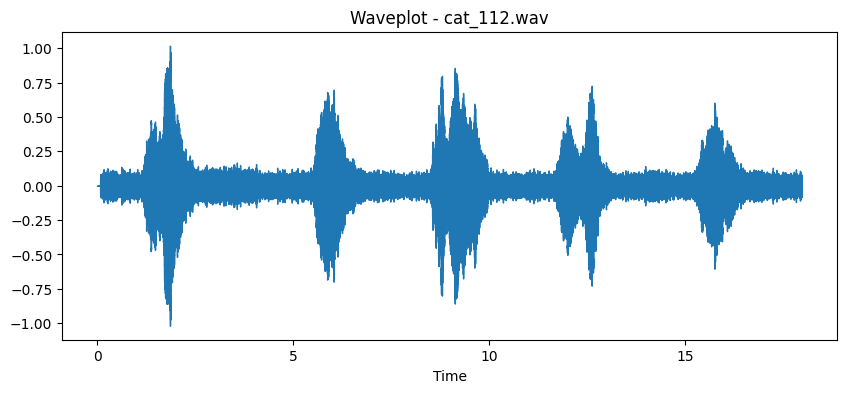

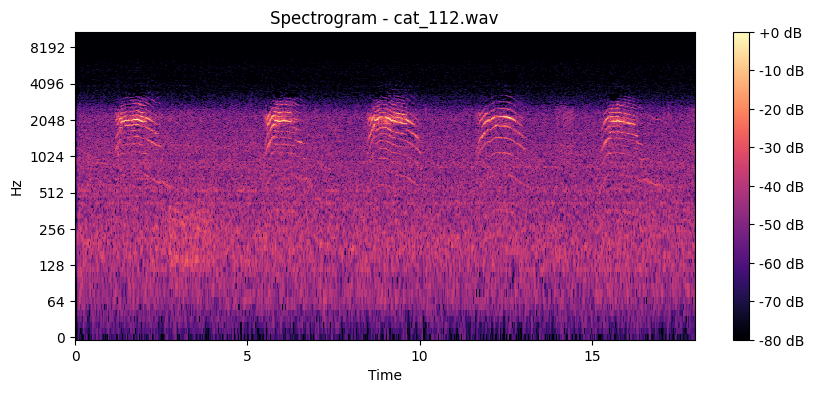

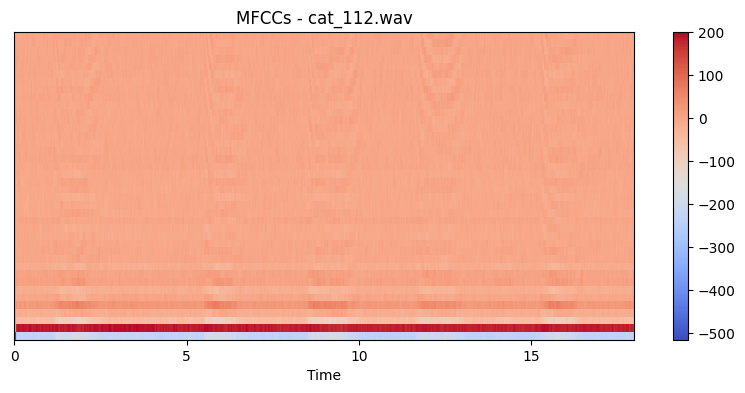

File: /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_i/i_dataset/cat_109.wav


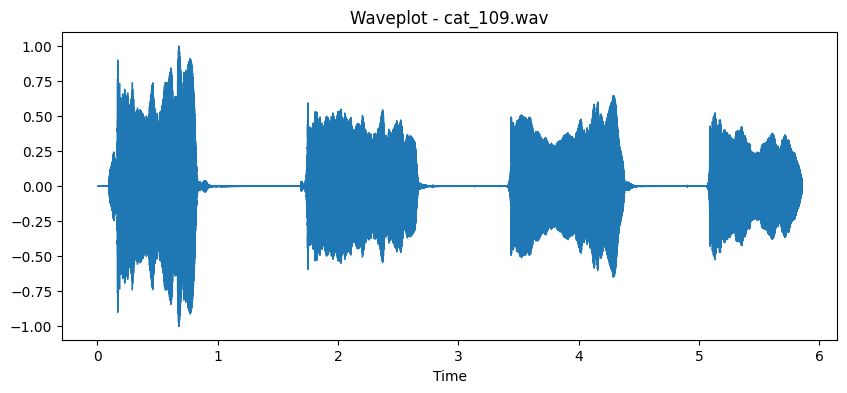

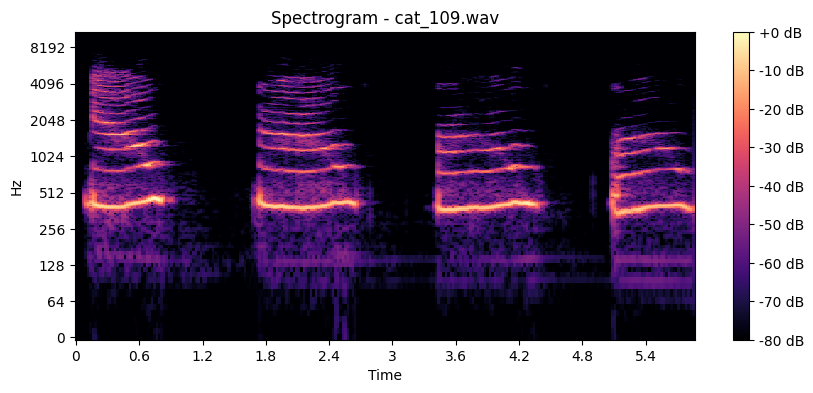

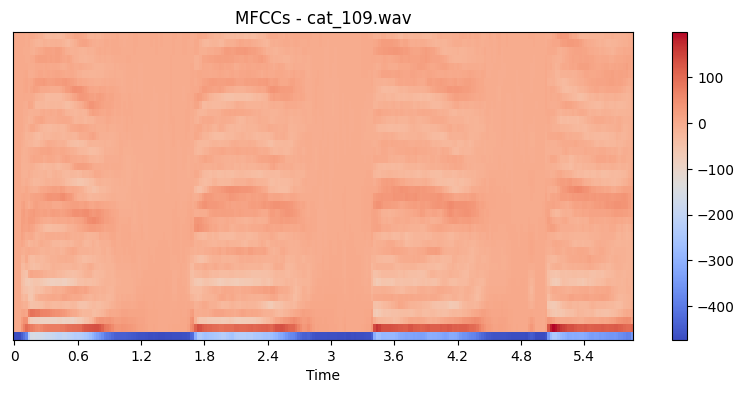


--------------------------------------------------



In [11]:
for i in range(2): # for each cluster
    print(f"Analyzing Cluster {i+1}")
    cluster_indices = np.where(y_kmeans == i)[0][:5]  # Take first 5 samples from each cluster for analysis
    for idx in cluster_indices:
        file_name = audio_files[idx]
        print(f"File: {file_name}")
        display(play_audio(file_name))
        plot_wave(file_name)
        plot_spectrogram(file_name)
        plot_mfccs(file_name)
    print("\n" + "-"*50 + "\n")


### Conclusion
In this project, we set out to perform clustering on a dataset of audio files labeled as 'cat' or 'dog'. The primary goal was to differentiate between cat and dog audio using unsupervised machine learning techniques. We achieved this through a series of steps: audio data loading, feature extraction using Mel-frequency cepstral coefficients (MFCCs), data preprocessing, application of the K-means clustering algorithm, and evaluation of the clustering results using the silhouette score.

**Key Findings**

- **Feature Extraction and Preprocessing**: The MFCC feature extraction method was effectively utilized to capture the essential characteristics of the audio data, which was then scaled for optimal clustering performance.

- **Clustering Results**: The K-means algorithm, set to create two clusters, was employed in an attempt to separate cat and dog sounds. The resulting silhouette score was approximately 0.26.

- **Silhouette Score Analysis**: This score suggests that the clustering has a moderate level of separation between the two groups (cats and dogs). While this indicates some success in differentiating between the two types of audio, the score also implies that there is considerable room for improvement, as the clusters are not highly distinct.

**Potential Areas for Improvement**
- **Feature Engineering**: Experimenting with different or additional audio features could potentially improve the clustering performance.

- **Clustering Algorithm**: Exploring other clustering algorithms like DBSCAN, hierarchical clustering, or Gaussian mixture models might yield better separation between clusters.

- **Hyperparameter Tuning**: Adjusting parameters of the MFCC extraction or the clustering algorithm itself could lead to more distinct clustering.

- **Larger Dataset**: If the current dataset is limited in size or diversity, expanding it could help in capturing a broader range of characteristics for each category.
